# MNIST dataset to be used

[Download dataset](http://yann.lecun.com/exdb/mnist/)

In [14]:
# Imports
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile, join

%matplotlib inline

In [15]:
mnist_path = './mnist_raw'

In [16]:
def list_files(mnist_path):
    return [join(mnist_path, f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f))]

In [17]:
# Testing the path and the files are correct
for f in list_files(mnist_path): print(f)

./mnist_raw/train-images-idx3-ubyte-2.gz
./mnist_raw/.DS_Store
./mnist_raw/t10k-images-idx3-ubyte-2.gz
./mnist_raw/t10k-labels-idx1-ubyte-2.gz
./mnist_raw/train-labels-idx1-ubyte-2.gz


### Read files and extract data

In [18]:
def get_images(mnist_path):
    for f in list_files(mnist_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)

        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)

    return x_train, y_train, x_test, y_test

### Testing data shape

In [19]:
x_train, y_train, x_test, y_test = get_images(mnist_path)

In [20]:
print(x_train.shape)

(60000, 28, 28)


In [21]:
print(y_train.shape)

(60000,)


In [22]:
print(x_test.shape)

(10000, 28, 28)


In [23]:
print(y_test.shape)

(10000,)


#### Graph image

In [24]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')

La imagen mostrada corresponde a un: 4


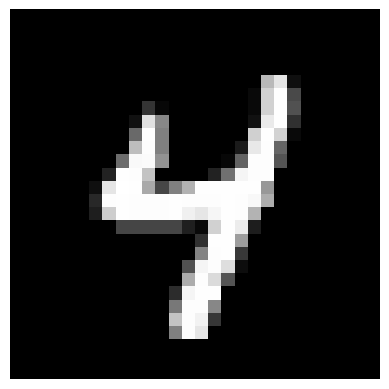

In [29]:
rand_idx = np.random.randint(len(y_test))
print(f'La imagen mostrada corresponde a un: {y_test[rand_idx]}')
plot_number(x_test[rand_idx])